In [1]:
# Importing general libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import h5py

from datasetFunctions import *
from sqlFunctions import *

In [3]:
import pandas as pd

# Getting the galaxy data
getGalaxyData("REFL0100N1504")

# Importing the galaxy data
dataFrame = pd.read_csv("REFL0100N1504galaxyData.txt", names=["x", "y", "z", "gn", "sgn", "mass", "vx", "vy", "vz", "sfr", "id"])
dataFrame = dataFrame.sort_values(by=["mass"], ascending=False)

#plt.loglog(dataFrame["mass"].to_numpy(), dataFrame["sfr"].to_numpy()/dataFrame["mass"].to_numpy(), "bo", markersize=1)


C:\Users\Matth\AppData\Local\Temp/ipykernel_5492/381679632.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(masses), np.log10(sfr/masses), "kx", markersize=1)


Text(0, 0.5, 'Specific Star Formation Rate')

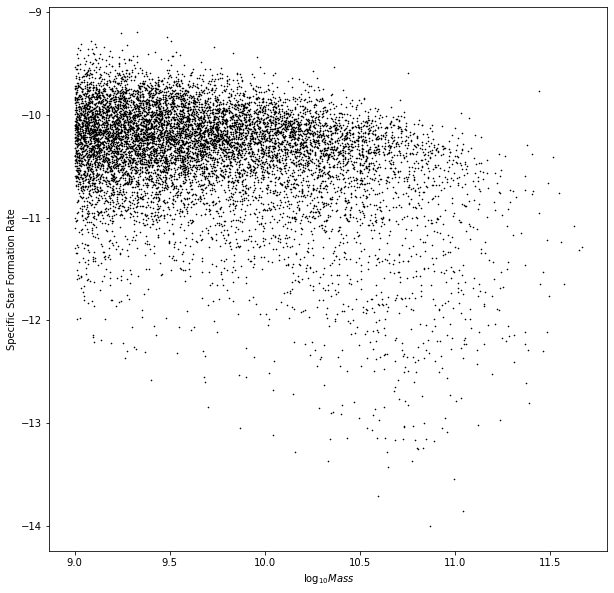

In [17]:
masses = dataFrame["mass"].to_numpy(dtype="float")
sfr = dataFrame["sfr"].to_numpy(dtype="float")
sfr = sfr[masses>=1e9]
masses = masses[masses>=1e9]
plt.figure(figsize=(10,10))
plt.plot(np.log10(masses), np.log10(sfr/masses), "kx", markersize=1)
plt.xlabel("$\log_{10} Mass$")
plt.ylabel("Specific Star Formation Rate")

In [18]:
dataFrame[dataFrame["mass"]>1e9]

,x,y,z,gn,sgn,mass,vx,vy,vz,sfr,id
104046,11.369572,80.663208,54.190159,1.0,1.0,4.647067e+11,276.759369,-433.286163,-500.466278,2.421584,21242350.0
74589,52.799755,4.919716,20.063511,4.0,0.0,4.485735e+11,169.470871,-91.019089,-41.866512,2.198527,21730535.0
84428,17.108519,79.767769,52.717827,1.0,0.0,4.196701e+11,-688.168213,-111.089821,-512.722412,3.514611,21109760.0
60630,76.670509,89.474174,41.884659,6.0,0.0,3.729405e+11,182.085388,-110.062401,10.391153,0.851944,21986361.0
478948,84.921928,47.613113,7.973583,9.0,0.0,3.587923e+11,71.844688,169.421143,-103.939507,2.074490,19701409.0
...,...,...,...,...,...,...,...,...,...,...,...
32829,8.646591,35.658226,54.385727,3.0,209.0,1.000430e+09,194.065369,-1463.170410,656.466187,0.000000,3508740.0
404362,83.884514,1.961068,31.579391,1877.0,1.0,1.000369e+09,126.687996,-112.218513,146.588165,0.144332,3079749.0
1392999,82.523705,15.519867,52.183128,906.0,2.0,1.000212e+09,-227.863388,39.892494,246.467545,0.177755,58831524.0
158949,60.879906,32.901093,19.958628,7.0,81.0,1.000095e+09,151.591599,-461.048248,947.293335,0.000000,5280539.0


In [39]:
v = np.array([1, 2, 3, 4])
z = v.tolist()
z = str(z) + ":"
print(z)

[1, 2, 3, 4]:


In [37]:
a = "[1, 2, 3, 4, 5, 6]:"
b = "[1, 2, 3, 4]:"
c = "[1, 2, 3, 4, 5]:"
d = np.array([])

d = np.append(d, a)
d = np.append(d, b)
d = np.append(d, c)

print(d)

#d = np.array([a, b, c])
np.savetxt("test.txt", d, fmt="%s")

['[1, 2, 3, 4, 5, 6]:' '[1, 2, 3, 4]:' '[1, 2, 3, 4, 5]:']


In [66]:
data = np.genfromtxt("spectra.txt", dtype="str", delimiter=":")

import json
d = json.loads(data[0][0])
d = np.array(d)
d

array([ -51.29095934,  -48.28398513,  -78.89114012,  -44.95798925,
        -48.57892878,  -66.63041634,  -33.24539367,  -41.63252191,
        -74.33836008, -110.33459239,  -39.97887628,  -40.55385379,
        -17.61383304,  -30.29042439,  -19.95970449,  -28.29852599,
        -12.68273722,  -18.78770671,  -16.8323448 ,  -56.79911864,
        -68.50185099,  -27.00140298,  -22.2520372 ,   -8.53015302,
        -41.51679569,   -4.73003263,  -10.35979118,   -5.65109289,
        -19.09001929,  -61.81235518, -111.93837422, -101.39846859,
        -89.50500926,  -67.54793188,   16.16369279,  -87.96758551,
         -0.35166519,  -10.86985893,   -9.99780185])

[Text(0.5, 0, 'y'), Text(0, 0.5, 'z')]

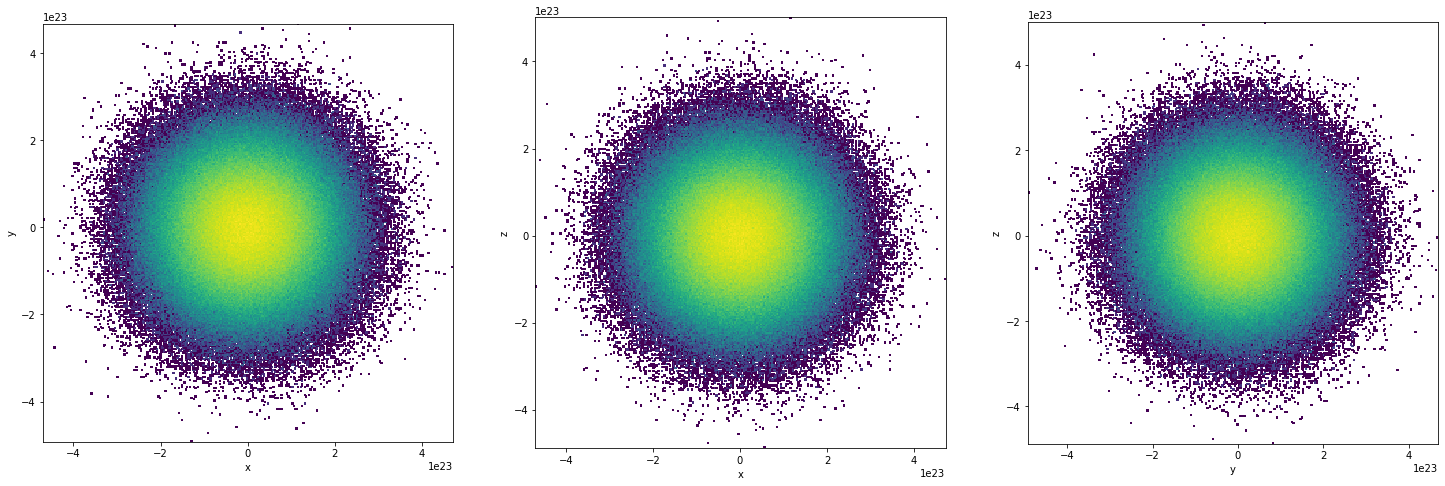

In [3]:
import matplotlib as mpl
from galaxyClass import galaxy

# Choosing the galaxy number
d = dataFrame.iloc[9]

# Getting galaxy properties
centre = np.array([d[0], d[1], d[2]])
velocity = np.array([d[6], d[7], d[8]])
gn = d[3]
sgn = d[4]

# Loading the galaxy
gal = galaxy(gn, sgn, centre, velocity, 0.5, True) # Region size given in cMPc/h

# Plotting 2D histograms of the galaxy
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1 = plt.subplot(1,3,1)
ax1.hist2d(gal.gx, gal.gy, bins=300, norm=mpl.colors.LogNorm())
ax1.set_aspect("equal")
ax1.set(xlabel="x", ylabel="y")
ax2 = plt.subplot(1,3,2)
ax2.hist2d(gal.gx, gal.gz, bins=300, norm=mpl.colors.LogNorm())
ax2.set_aspect("equal")
ax2.set(xlabel="x", ylabel="z")
ax3 = plt.subplot(1,3,3)
ax3.hist2d(gal.gy, gal.gz, bins=300, norm=mpl.colors.LogNorm())
ax3.set_aspect("equal")
ax3.set(xlabel="y", ylabel="z")


In [4]:
print(min(gal.oldSF/gal.scaleFactor), max(gal.oldSF/gal.scaleFactor))

0.9999999999999996 1.0000000000000004


[Text(0.5, 0, 'y'), Text(0, 0.5, 'z')]

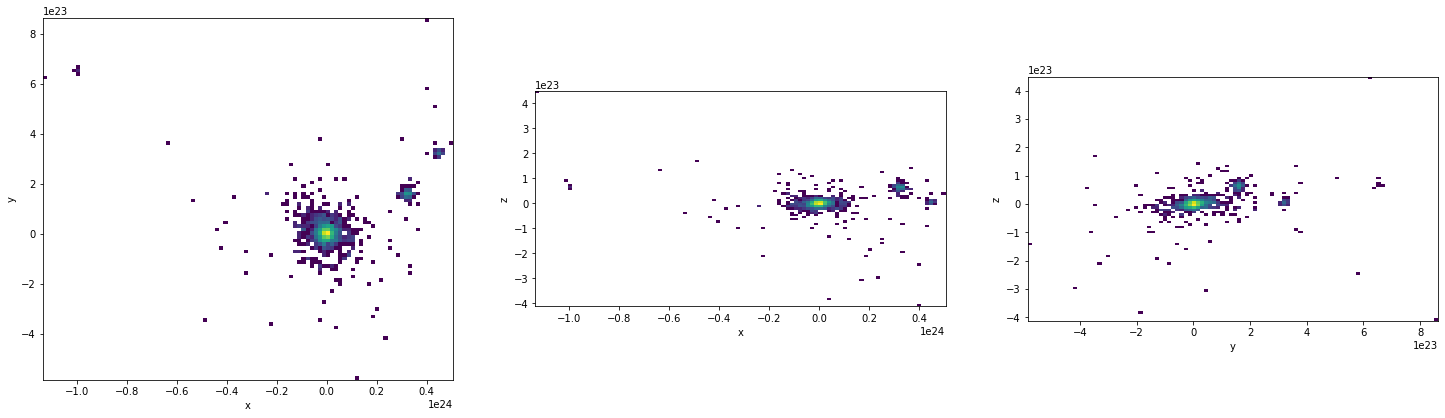

In [38]:
# Plotting 2D histograms of the galaxy stars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1 = plt.subplot(1,3,1)
ax1.hist2d(gal.sx, gal.sy, bins=100, norm=mpl.colors.LogNorm())
ax1.set_aspect("equal")
ax1.set(xlabel="x", ylabel="y")
ax2 = plt.subplot(1,3,2)
ax2.hist2d(gal.sx, gal.sz, bins=100, norm=mpl.colors.LogNorm())
ax2.set_aspect("equal")
ax2.set(xlabel="x", ylabel="z")
ax3 = plt.subplot(1,3,3)
ax3.hist2d(gal.sy, gal.sz, bins=100, norm=mpl.colors.LogNorm())
ax3.set_aspect("equal")
ax3.set(xlabel="y", ylabel="z")


1.542634722617215e+21


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
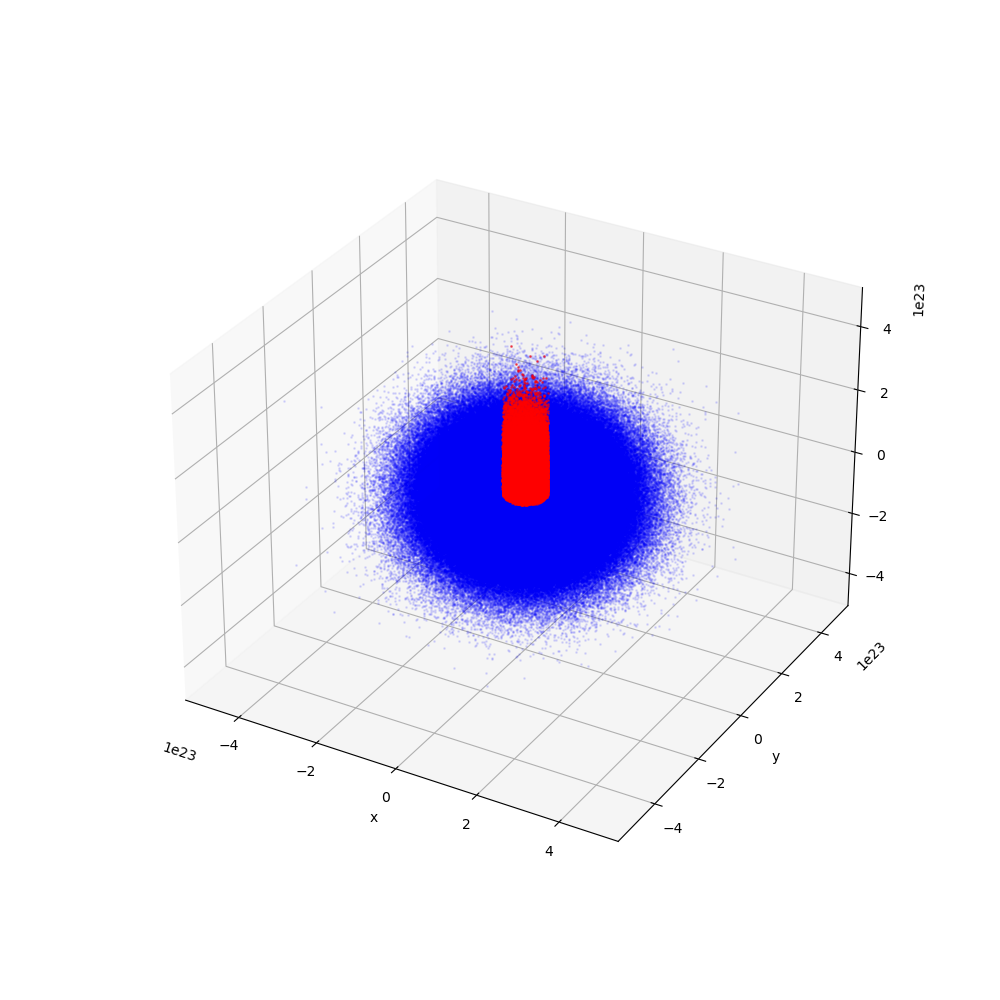

In [8]:

_, _ = gal.cylinder([0,0,1], 5e22)

%matplotlib widget
plt.figure(figsize=(10,10))
plt.axes(projection="3d")
plt.plot(gal.gx, gal.gy, gal.gz, "bo", markersize=1, alpha=0.1)
plt.plot(gal.gx[gal.inCylinder], gal.gy[gal.inCylinder], gal.gz[gal.inCylinder], "ro", markersize=1, alpha=0.5)
#plt.hist2d(gal.gx[gal.inCylinder], gal.gy[gal.inCylinder], bins=200)
#plt.plot(gal.gx[gal.inCylinder], gal.gz[gal.inCylinder],"o", markersize=1)



plt.xlabel("x")
plt.ylabel("y")
#plt.hlines(0, -9e22, 9e22, "b")
#plt.vlines(0, -9e22, 9e22)

#print(min(gal.gz[gal.inCylinder]))
print(min(gal.scaleFactor))


In [39]:
from galaxyClass import galaxy
from geometricFunctions import getVectorFromAngle

d = dataFrame.iloc[9]

centre = np.array([d[0], d[1], d[2]])
velocity = np.array([d[6], d[7], d[8]])
gn = d[3]
sgn = d[4]

gal = galaxy(gn, sgn, centre, velocity, 0.5) # Region size given in cMPc/h

# Creating arrays of theta and phi to vary over
theta = np.linspace(0, np.pi, 25)
phi = np.linspace(0, 2*np.pi, 50)

# Creating 2D grid of points
vels = np.zeros((len(theta), len(phi)))

for i in range(len(phi)):
    for j in range(len(theta)):
        vec = getVectorFromAngle(theta[j], phi[i])

        vlos, w = gal.cylinder(vec, 9.25e22)

        vels[j][i] = w


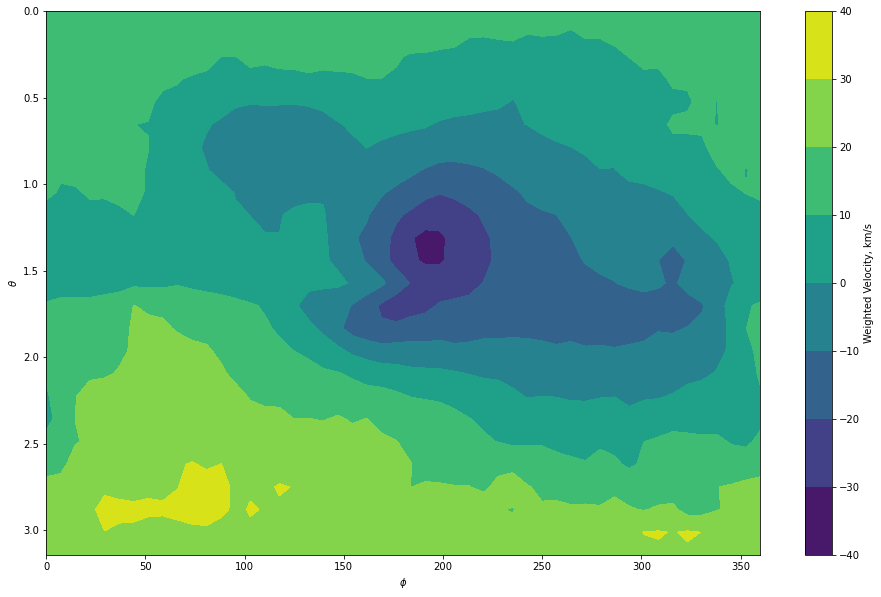

In [40]:

plt.figure(figsize=(16,10))
#plt.subplot(projection="mollweide")
plt.contourf(phi*(360/(2*np.pi)), theta, vels)
plt.colorbar(label="Weighted Velocity, km/s")
plt.xlabel("$\\phi$")
plt.ylabel("$\\theta$")
plt.gca().invert_yaxis()

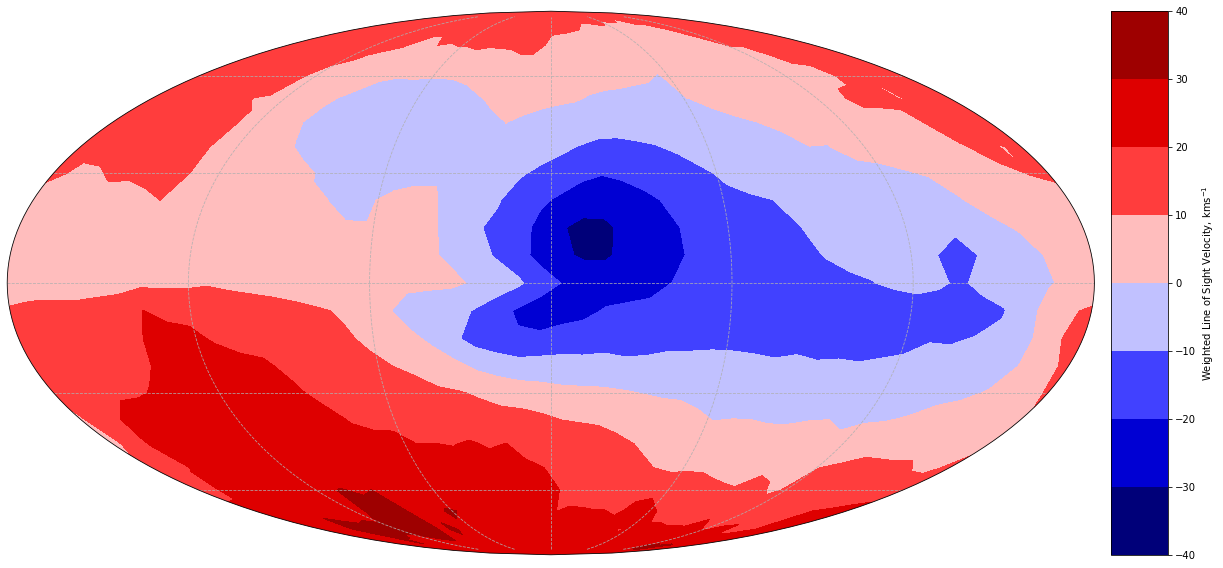

In [41]:
import cartopy.crs as ccrs

x = np.linspace(-180, 180, len(phi))
y = np.linspace(90, -90, len(theta))

fig, ax = plt.subplots(1, 1, figsize=(20,10), subplot_kw={'projection': ccrs.Mollweide()})
axpos = ax.get_position()
posX = axpos.x0+axpos.width + 0.2
posY = axpos.y0
cax_width = 0.04
cax_height = axpos.height
pos_cax = fig.add_axes([posX,posY,cax_width,cax_height])
im = ax.contourf(x, y, vels, transform=ccrs.PlateCarree(), cmap="seismic")
plt.colorbar(im, cax=pos_cax, label="Weighted Line of Sight Velocity, $\\rmkms^{-1}$")
gl = ax.gridlines(draw_labels=False, alpha=0.9, linestyle="--")

Text(0.5, 0, 'inclination, i')

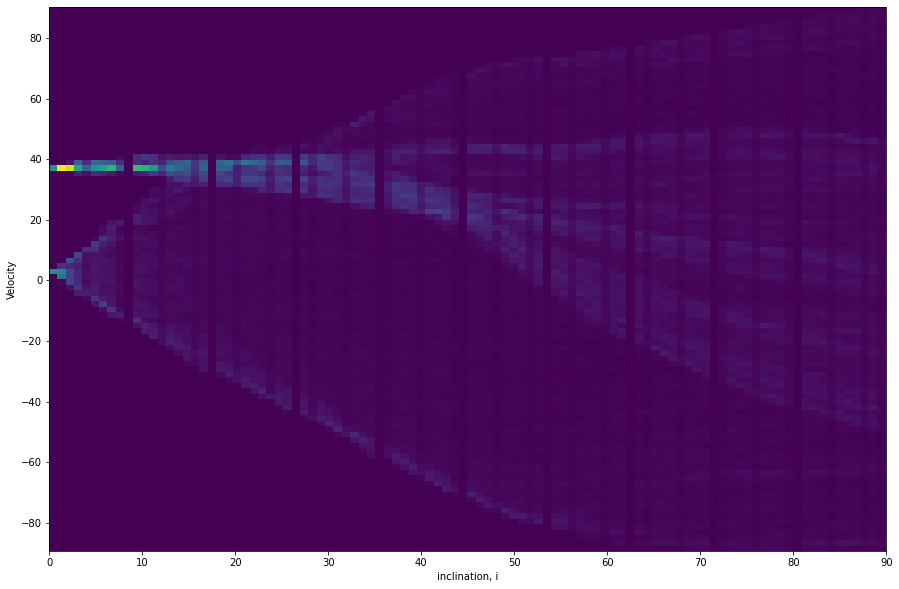

In [45]:
from geometricFuncions import getCylinders

# Number of cylinders we want
cylinders = 100000

vectors, inclinations, angles = getCylinders(cylinders)

wList = gal.analyseGalaxy(vectors, 19 * 1e3 * 3.09e18)

plt.figure(figsize=(15,10))
h = plt.hist2d(inclinations, wList, bins=100)
plt.ylabel("Velocity")
plt.xlabel("inclination, i")


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data2.csv", delimiter=",")

# Only getting galaxies with particles
df = df[df["Particles"] == True]
df["N Particles"] = pd.to_numeric(df["N Particles"])
df = df[df["N Particles"] > 0]

# Logging the mass and star formation rates
df["Mass"] = np.log10(df["Mass"])
df["Star Formation Rate"] = np.log10(df["Star Formation Rate"])

# Creating bins
binNum = 10
df["Binned Mass"], massBinVals = pd.cut(df["Mass"], binNum, retbins=True)
df["Binned Sfr"], sfrBinVals = pd.cut(df["Star Formation Rate"], binNum, retbins=True)

massBins = np.unique(df["Binned Mass"])
sfrBins = np.unique(df["Binned Sfr"])

# Creating grid for plotting
x, y = np.meshgrid(massBinVals, sfrBinVals)
z = np.zeros((binNum, binNum))

# Assigning velocities to the grid
for m in range(binNum):
    for s in range(binNum):
        vels = df[df["Binned Mass"] == massBins[m]]
        vels = vels[vels["Binned Sfr"] == sfrBins[s]]

        z[m][s] = np.mean(vels["Velocity"].to_numpy(dtype=np.float64))



c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Matth\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\User

Text(0, 0.5, 'Star Formation Rate, $\\log \\: M_\\odot yr^{-1}$')

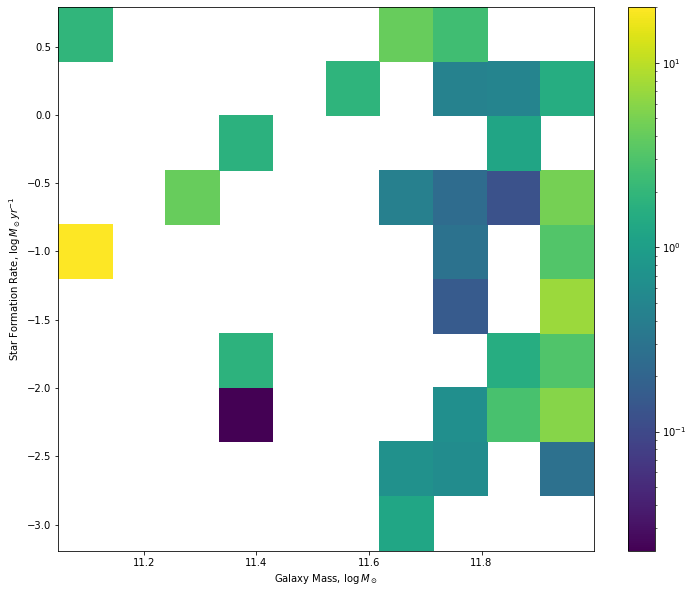

In [50]:
import matplotlib as mpl
plt.figure(figsize=(12,10))    
ax = plt.pcolormesh(x, y, z, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlabel("Galaxy Mass, $\log \: M_\odot$")
plt.ylabel("Star Formation Rate, $\log \: M_\odot yr^{-1}$")

In [59]:
#spectrums = np.loadtxt("spectra.txt", delimiter=",")
#data = pd.read_csv("spectra.txt", header=None, delimiter=",", engine="python")

f = open("spectra.txt")
line = f.readline()



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



Null



-24.95164853133616,16.56702241803565,-24.982021964451974,20.14480809613805,2.7924155722786175,11.442023999469724,111.64190084302902,83.39639618186304,68.88203897088694,32.578278377222304,209.8401898762341,176.09475687350823,0.6442488186201114,21.62854476042522,1.6375695182231311,5.545273576952081,-0.6854989305421704,6.886527476811206,6.89557885234485,3.520942023425807,16.51389103678787,14.079176637844096,9.631058173681536,-2.5242654462868437,49.06267273526592,2.730606717245289,0.5651851985441958,3.2197834172500865,3.0210933871533356,-0.07536975942830892,5.9720571278111,9.162549196925863,10.831096791185626,5.313205184915416,8.416755144754706,7.576

In [18]:
from astropy.table import Table
data = Table.read("MyDB.txt",format='ascii')

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:HTML fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ecsv fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Mrt fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************